In [14]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from finta import TA
import mplfinance as mpf
from pandas_datareader import data as web

%matplotlib notebook

In [15]:
df = pd.read_csv('./data/MSFT_daily.csv',header=0, index_col="date", parse_dates=True)

df = df.iloc[::-1]


<IPython.core.display.Javascript object>


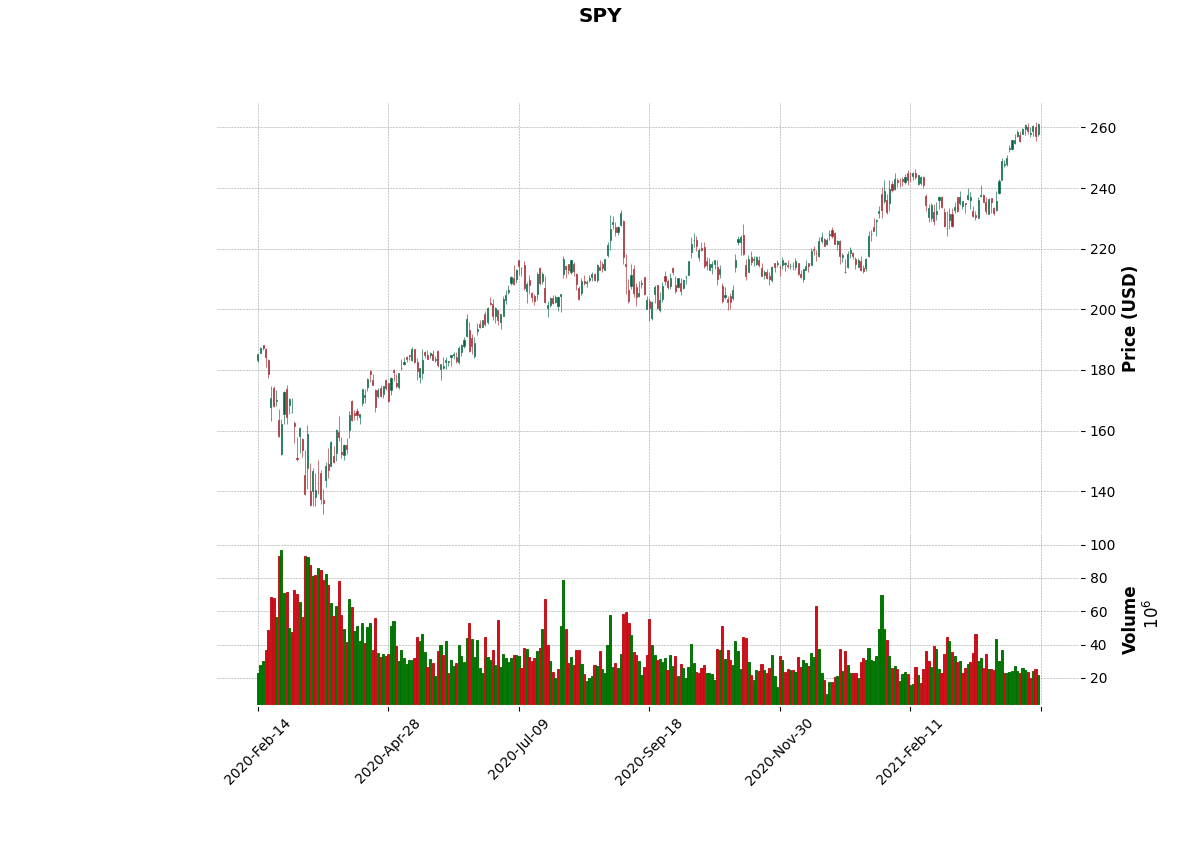

In [17]:
df.columns = ["open", "high", "low", "close", "volume"]
#df = df.iloc[::-1]

mpf.plot(df.tail(300), type='candle', style='charles',
        title='SPY',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        )

In [18]:
df.dtypes
#df['Datetime'] = pd.to_datetime(df['Date'], format="%Y/%m/%d")

open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

<IPython.core.display.Javascript object>


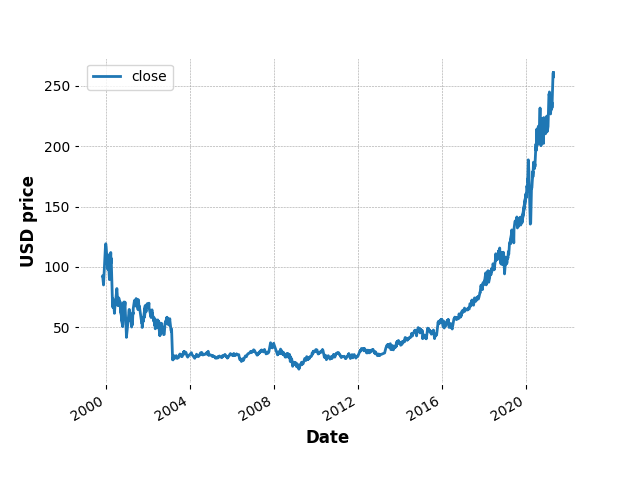

Text(0.5, 0, 'Date')

In [21]:
ax = df.plot(y='close')

ax.set_ylabel("USD price")
ax.set_xlabel("Date")

In [22]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['close']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['21sd'] =  dataset['close'].rolling(window=21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['21sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['21sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['close']-1
    
    return dataset

In [24]:
dataset_TI_df = get_technical_indicators(df)

<IPython.core.display.Javascript object>


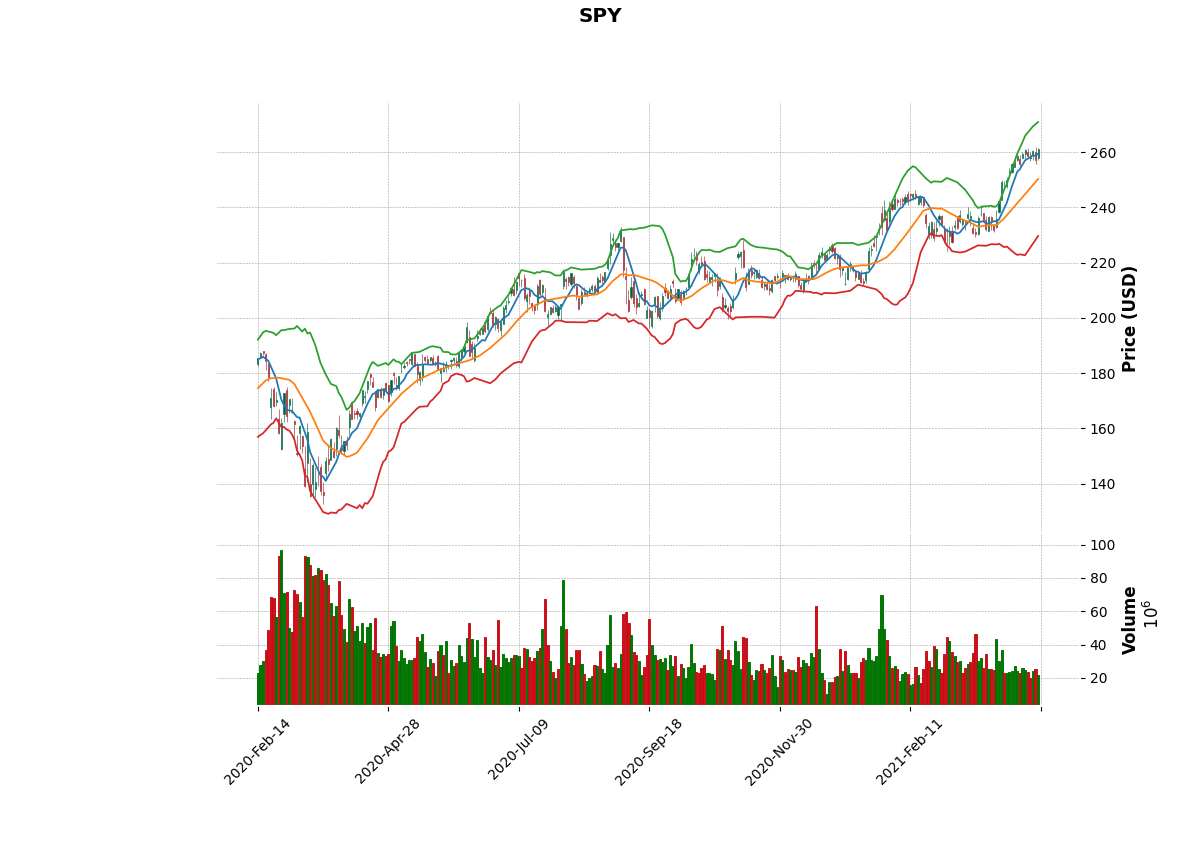

In [43]:
import mplfinance as mpf

bands_plot = pd.concat([dataset_TI_df['ma7'].tail(300), dataset_TI_df['ma21'].tail(300), 
                        dataset_TI_df['upper_band'].tail(300), dataset_TI_df['lower_band'].tail(300)], axis=1)

apd = mpf.make_addplot(bands_plot)

mpf.plot(dataset_TI_df.tail(300), type='candle', style='charles',
        title='SPY',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

In [56]:
import matplotlib.pyplot as plt

def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


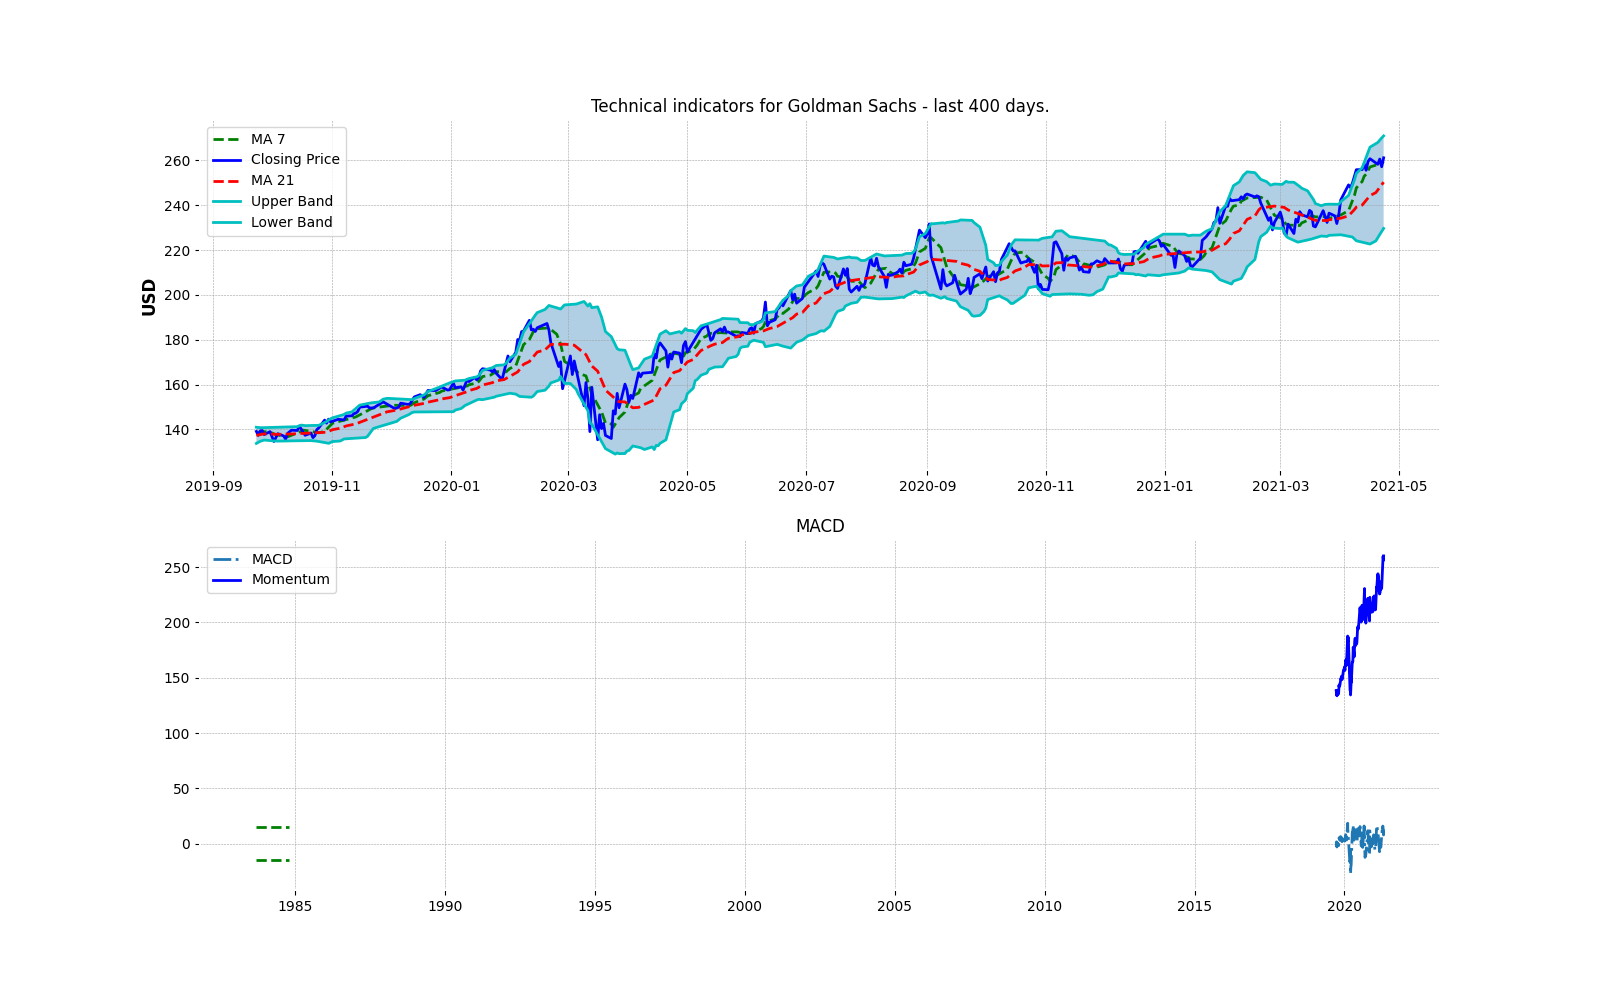

In [57]:
plot_technical_indicators(dataset_TI_df, 400)